<a href="https://colab.research.google.com/github/esmanurulu/Predicting-Road-Accident-Risk-using-Deep-Regression-on-Synthetic-Data/blob/main/yap470_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
print("Kaggle kütüphanesi yüklendi.")

Kaggle kütüphanesi yüklendi.


In [ ]:
from google.colab import files
#for my kaggle id
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"esmanurulu","key":"55770ac72bb7ad8864daf4954fd2f850"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
print("Kaggle API ayarlandı.")

Kaggle API ayarlandı.


In [ ]:
# playground-series-s5e10, verilerini kullanacağımız yarışma
!kaggle competitions download -c playground-series-s5e10
print("Dataset indirildi.")

  0% 0.00/7.76M [00:00<?, ?B/s]
100% 7.76M/7.76M [00:00<00:00, 395MB/s]
Dataset indirildi.


In [ ]:
!unzip playground-series-s5e10.zip
print("'train.csv', 'test.csv','sample_submission.csv' ")

Archive:  playground-series-s5e10.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               
'train.csv', 'test.csv','sample_submission.csv' 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

try:
    df = pd.read_csv('train.csv')
    print(f"veri seti boyutu: {df.shape}")
    print(df.head())

except FileNotFoundError:
    print("HATA: 'train.csv' dosyası bulunamadı.")

veri seti boyutu: (517754, 14)
   id road_type  num_lanes  curvature  speed_limit  lighting weather  \
0   0     urban          2       0.06           35  daylight   rainy   
1   1     urban          4       0.99           35  daylight   clear   
2   2     rural          4       0.63           70       dim   clear   
3   3   highway          4       0.07           35       dim   rainy   
4   4     rural          1       0.58           60  daylight   foggy   

   road_signs_present  public_road time_of_day  holiday  school_season  \
0               False         True   afternoon    False           True   
1                True        False     evening     True           True   
2               False         True     morning     True          False   
3                True         True     morning    False          False   
4               False        False     evening     True          False   

   num_reported_accidents  accident_risk  
0                       1           0.13  
1    

In [ ]:
print("** Veri Tipleri - Bellek Kullanımı **")
#(veri tipleri, non-null sayisi)
df.info()

print("\n" + "*"*60 + "\n")
print("** Eksik Değerler Var Mı? **")
#(NaN) sayımı = eksik deger kontrolu
missing_values = df.isnull().sum()
print(missing_values)
total_missing = missing_values.sum()
if total_missing == 0:
    print("\nVeri setinde hiç eksik değer bulunmuyor.")
else:
    print(f"\nVeri setinde TOPLAM {total_missing} adet eksik değer bulunduğu tespit edildi.")

print("\n" + "*"*60 + "\n")
print("** Duplicate Row Var Mı? **")
duplicate_rows = df.duplicated().sum()

if duplicate_rows > 0:
    print(f"\n Veri setinde {duplicate_rows} adet tekrar eden satır bulundu.")
    print("Bu satırlar veri setinden çıkarılıyor...")
    df = df.drop_duplicates(inplace=False)
    print(f"Tekrar eden satırlar silindi. Yeni boyut: {df.shape}")
else:
    print("\n Veri setinde hiç tekrar eden satır bulunmadı.")

print("\n" + "*"*60 + "\n")
print("** Benzersiz Değer Sayıları (Cardinality) **")
# unique değer sayısı hesabı
print(df.nunique())

print("\n" + "*"*60 + "\n")
print("** Genel İstatistiksel Özet **")
print(df.describe(include='all').transpose())

** Veri Tipleri - Bellek Kullanımı **
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-n

In [ ]:
categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
                        'public_road', 'time_of_day', 'holiday', 'school_season']

print(f"{len(categorical_features)} adet kategorik özellik bulundu.")

8 adet kategorik özellik bulundu.


In [ ]:
for col in categorical_features:
    print(f"\n" + "*"*30 + f" {col} Sütunu " + "*"*30)
    count_table = df[col].value_counts()
    percentage_table = df[col].value_counts(normalize=True) * 100
    combined_table = pd.DataFrame({'Sayı (Count)': count_table, 'Yüzde (%)': percentage_table.round(2)})

    print(combined_table)


****************************** road_type Sütunu ******************************
           Sayı (Count)  Yüzde (%)
road_type                         
highway          173672      33.54
rural            172719      33.36
urban            171363      33.10

****************************** lighting Sütunu ******************************
          Sayı (Count)  Yüzde (%)
lighting                         
dim             183826      35.50
daylight        178015      34.38
night           155913      30.11

****************************** weather Sütunu ******************************
         Sayı (Count)  Yüzde (%)
weather                         
foggy          181463      35.05
clear          179306      34.63
rainy          156985      30.32

****************************** road_signs_present Sütunu ******************************
                    Sayı (Count)  Yüzde (%)
road_signs_present                         
False                     259289      50.08
True                      258465

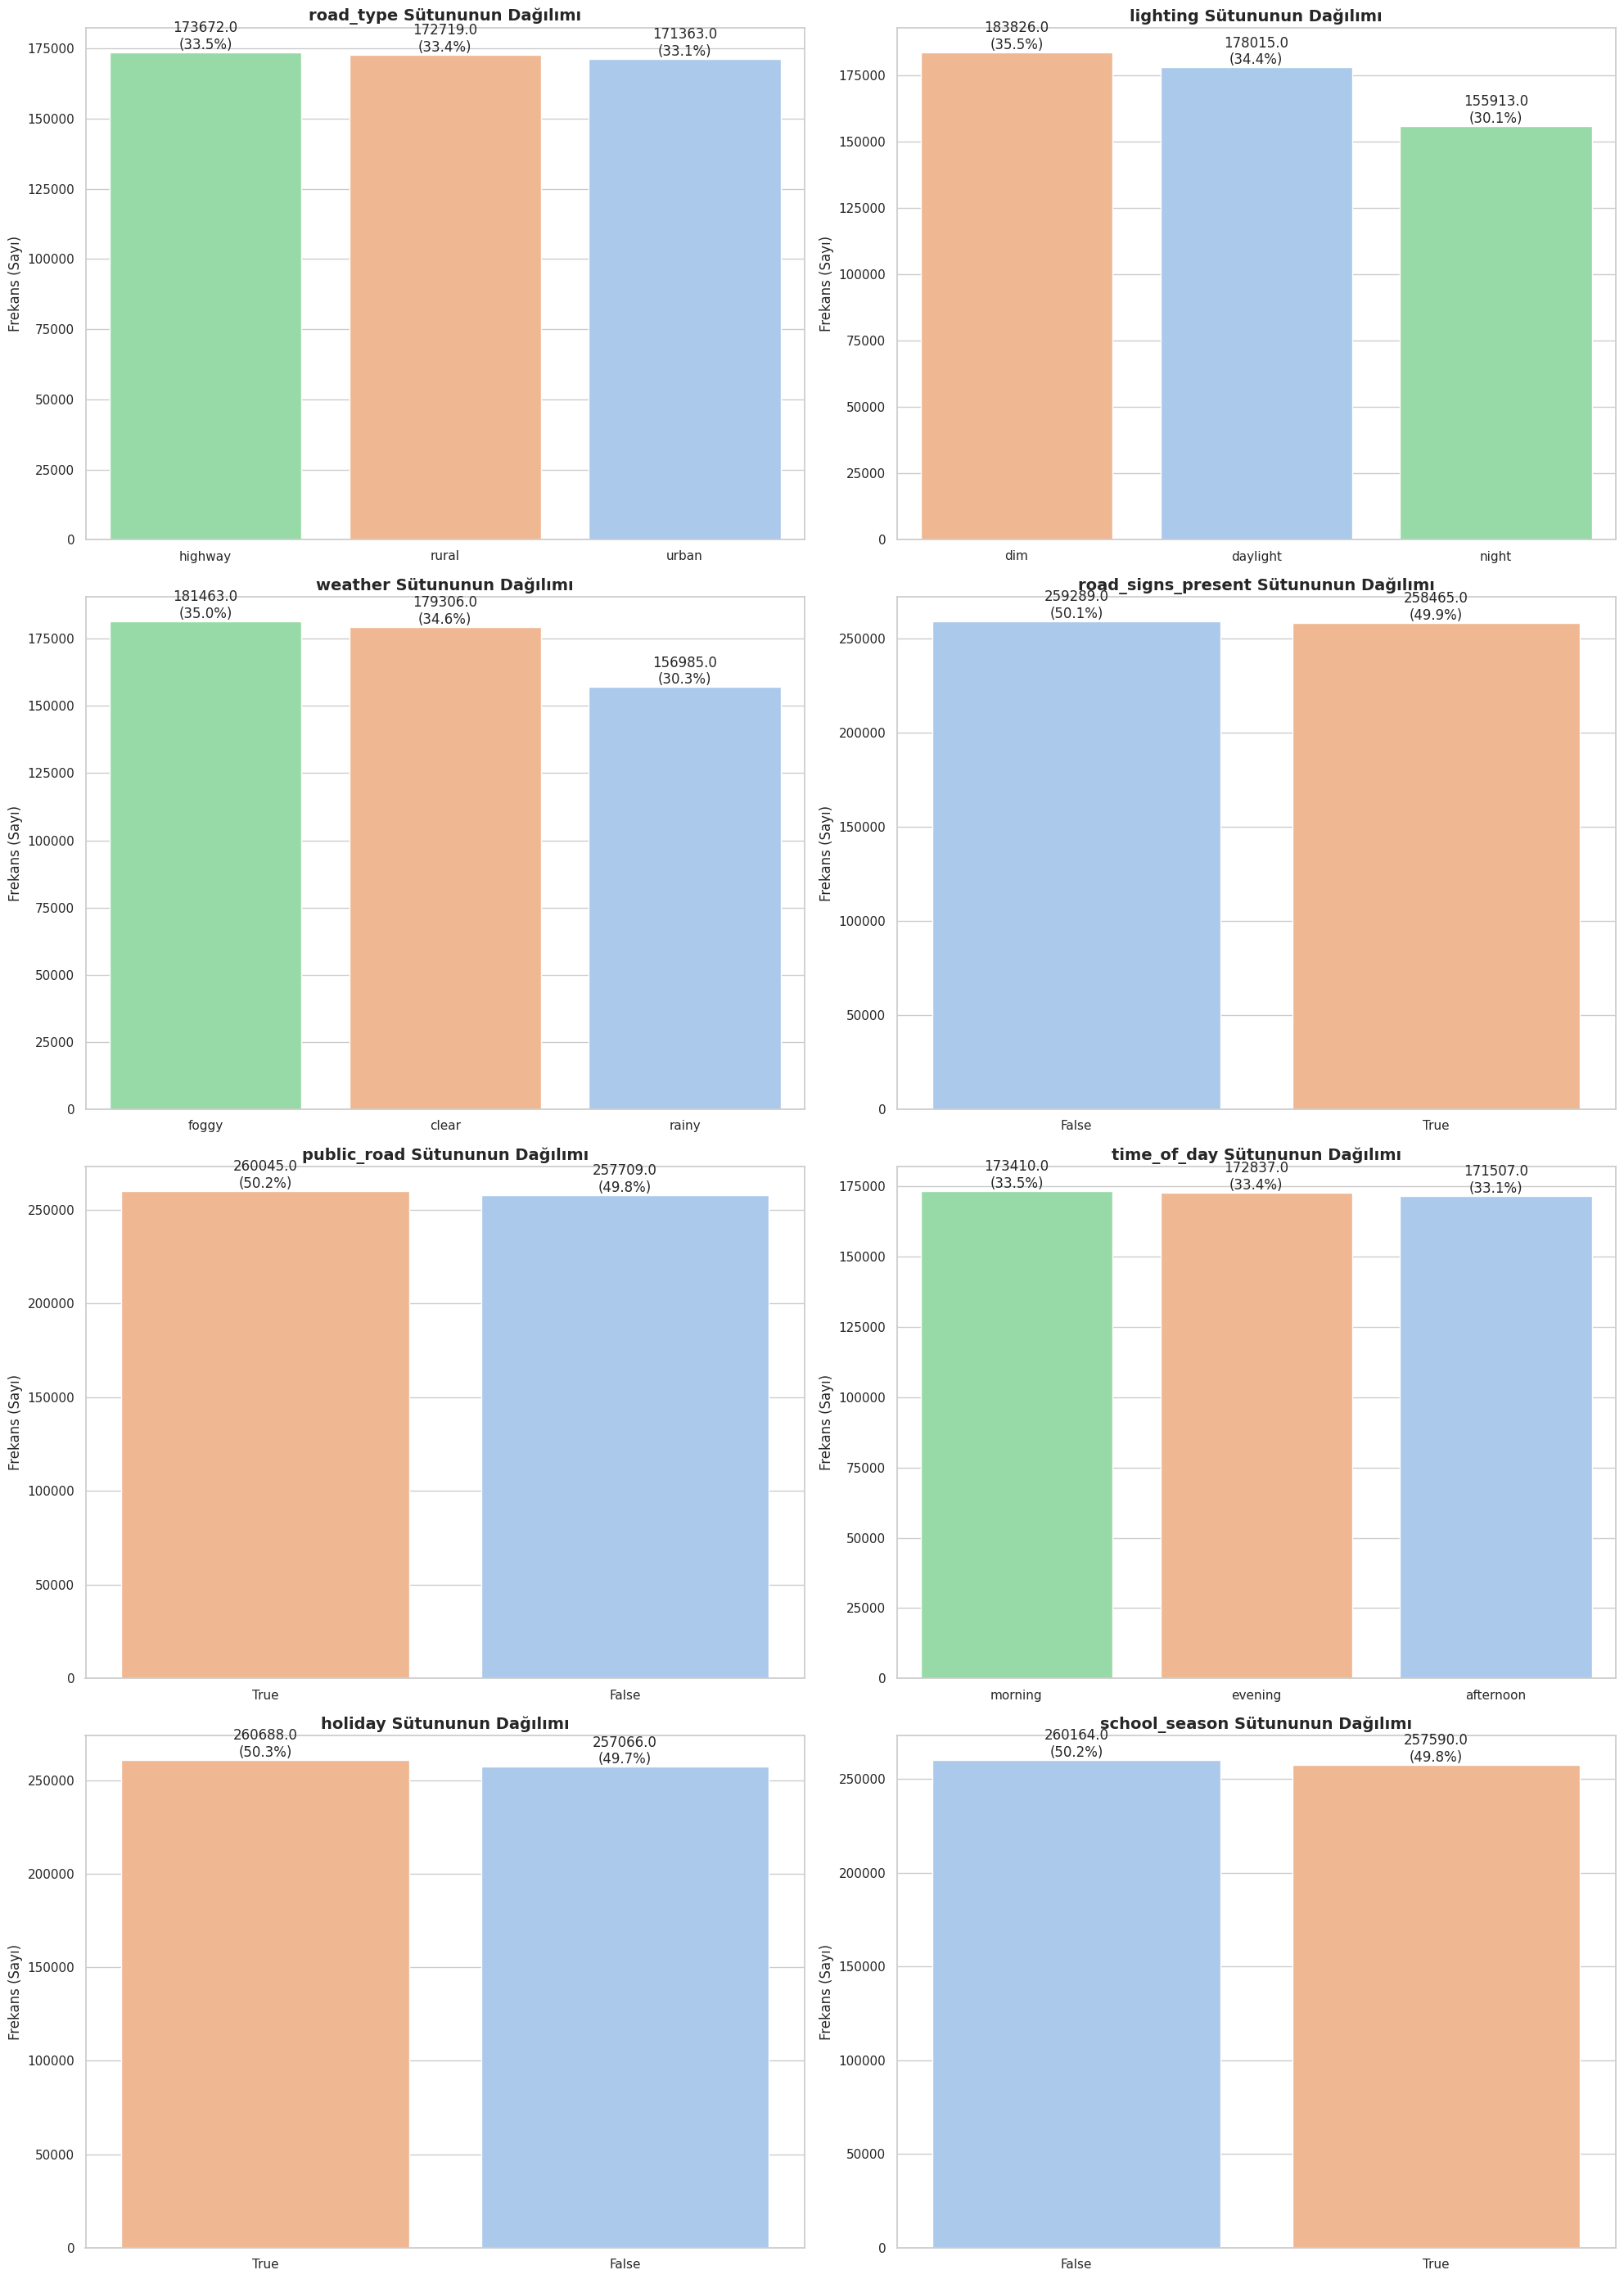

In [ ]:
fig, axes = plt.subplots(4, 2, figsize=(20, 28))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    sns.countplot(
        x=df[col],
        ax=axes[i],
        palette='pastel',
        order=df[col].value_counts().index,
        hue=df[col],
        legend=False
    )

    axes[i].set_title(f'{col} Sütununun Dağılımı', fontsize=14, weight='bold')
    axes[i].set_ylabel('Frekans (Sayı)', fontsize=12)
    axes[i].set_xlabel('')

    total = len(df[col])
    for p in axes[i].patches:
        height = p.get_height()
        axes[i].text(p.get_x() + p.get_width() / 2.,
                     height + 3,
                     f'{height}\n({height/total*100:.1f}%)',
                     ha="center", va="bottom")
plt.tight_layout()
plt.show()

4 adet sayısal özellik incelenecek.


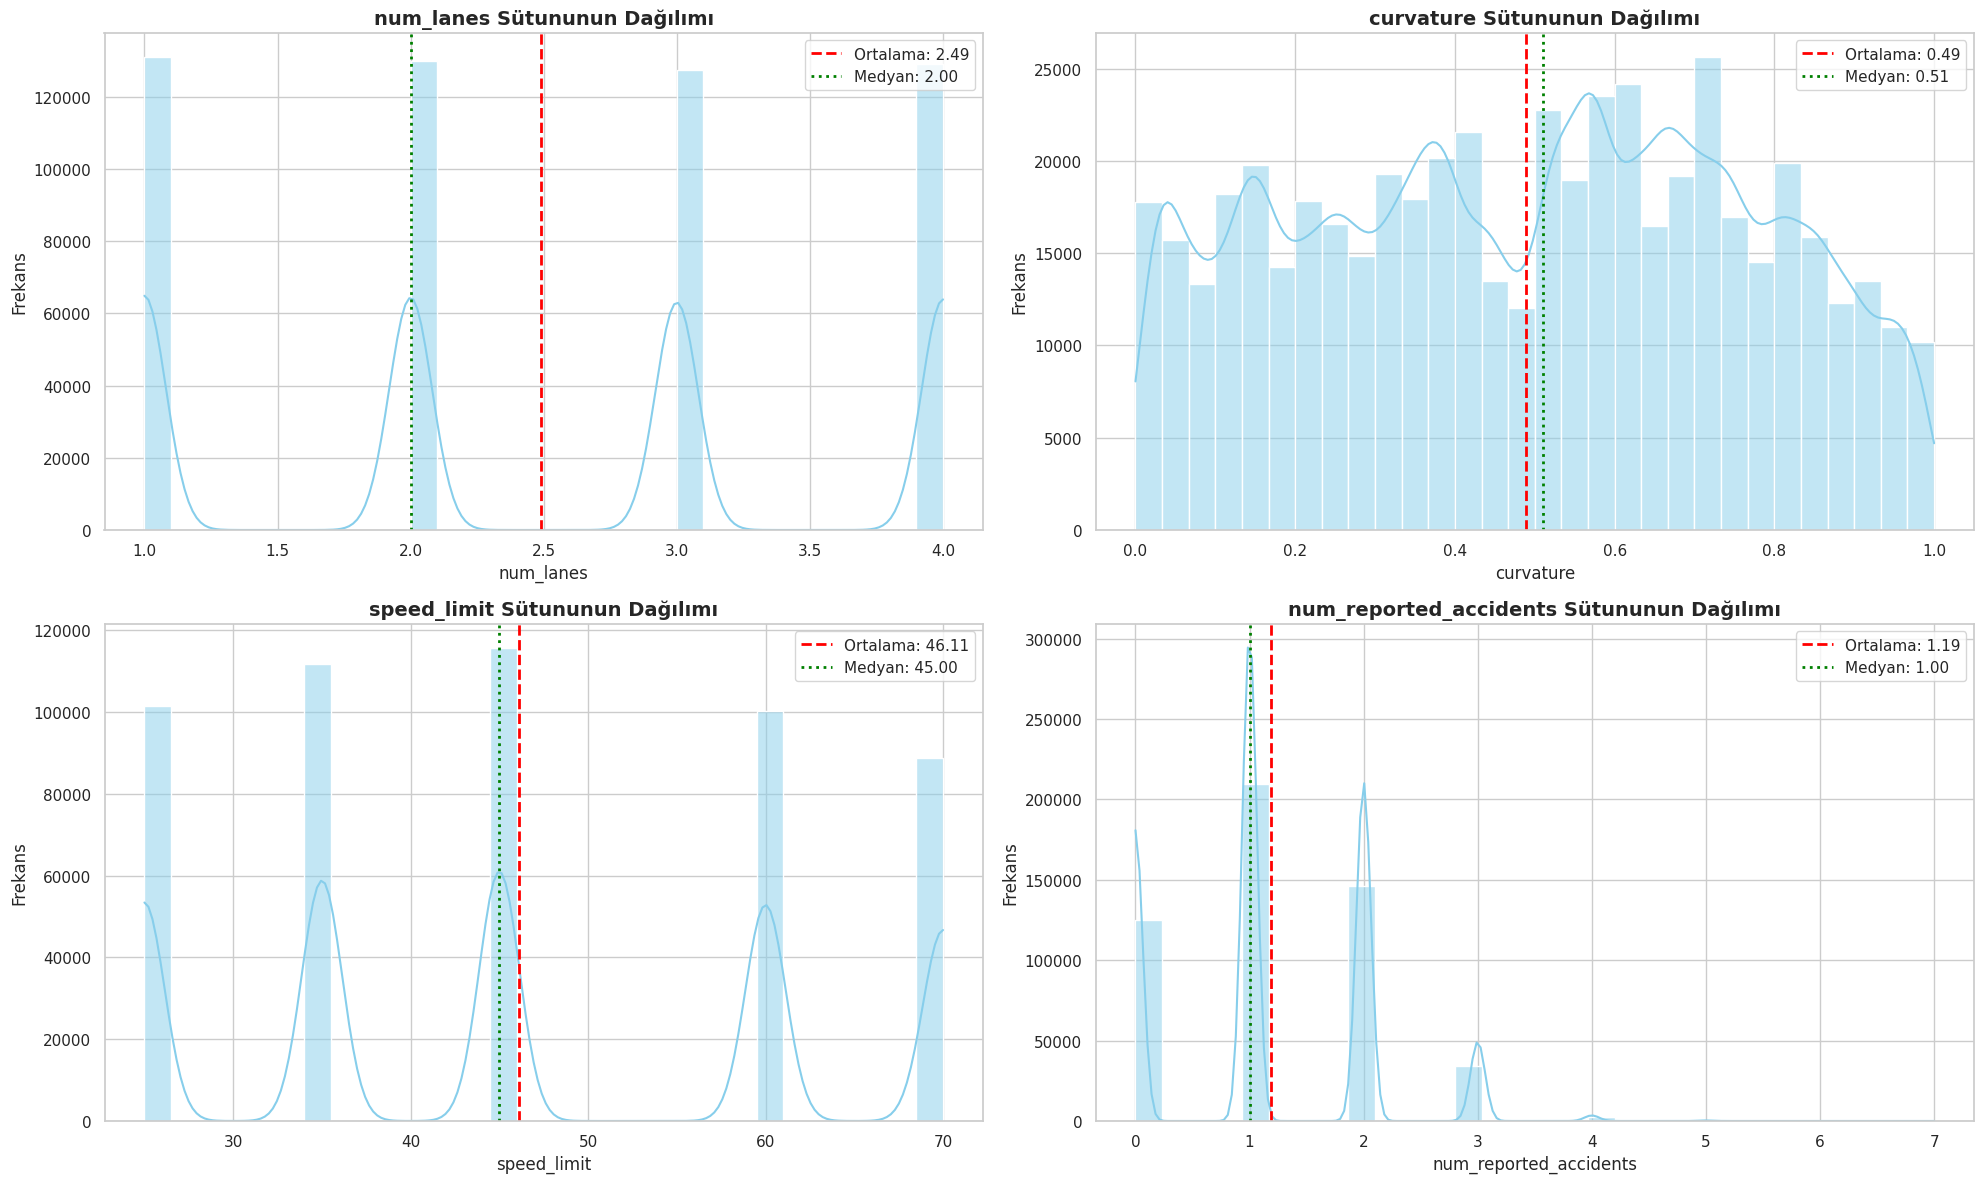

In [ ]:
# sayısal özelliklerimiz
numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
print(f"{len(numerical_features)} adet sayısal özellik incelenecek.")
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.histplot(
        df[col],
        kde=True,
        ax=axes[i],
        color='skyblue',
        bins=30
    )
    axes[i].set_title(f'{col} Sütununun Dağılımı', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)
    axes[i].set_ylabel('Frekans', fontsize=12)

    # Ortalama ve Medyan
    mean_val = df[col].mean()
    median_val = df[col].median()
    # Kırmızı kesikli çizgi = Ortalama
    axes[i].axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Ortalama: {mean_val:.2f}')
    # Yeşil noktalı çizgi = Medyan
    axes[i].axvline(median_val, color='green', linestyle=':', linewidth=2, label=f'Medyan: {median_val:.2f}')
    axes[i].legend()

plt.tight_layout()
plt.show()

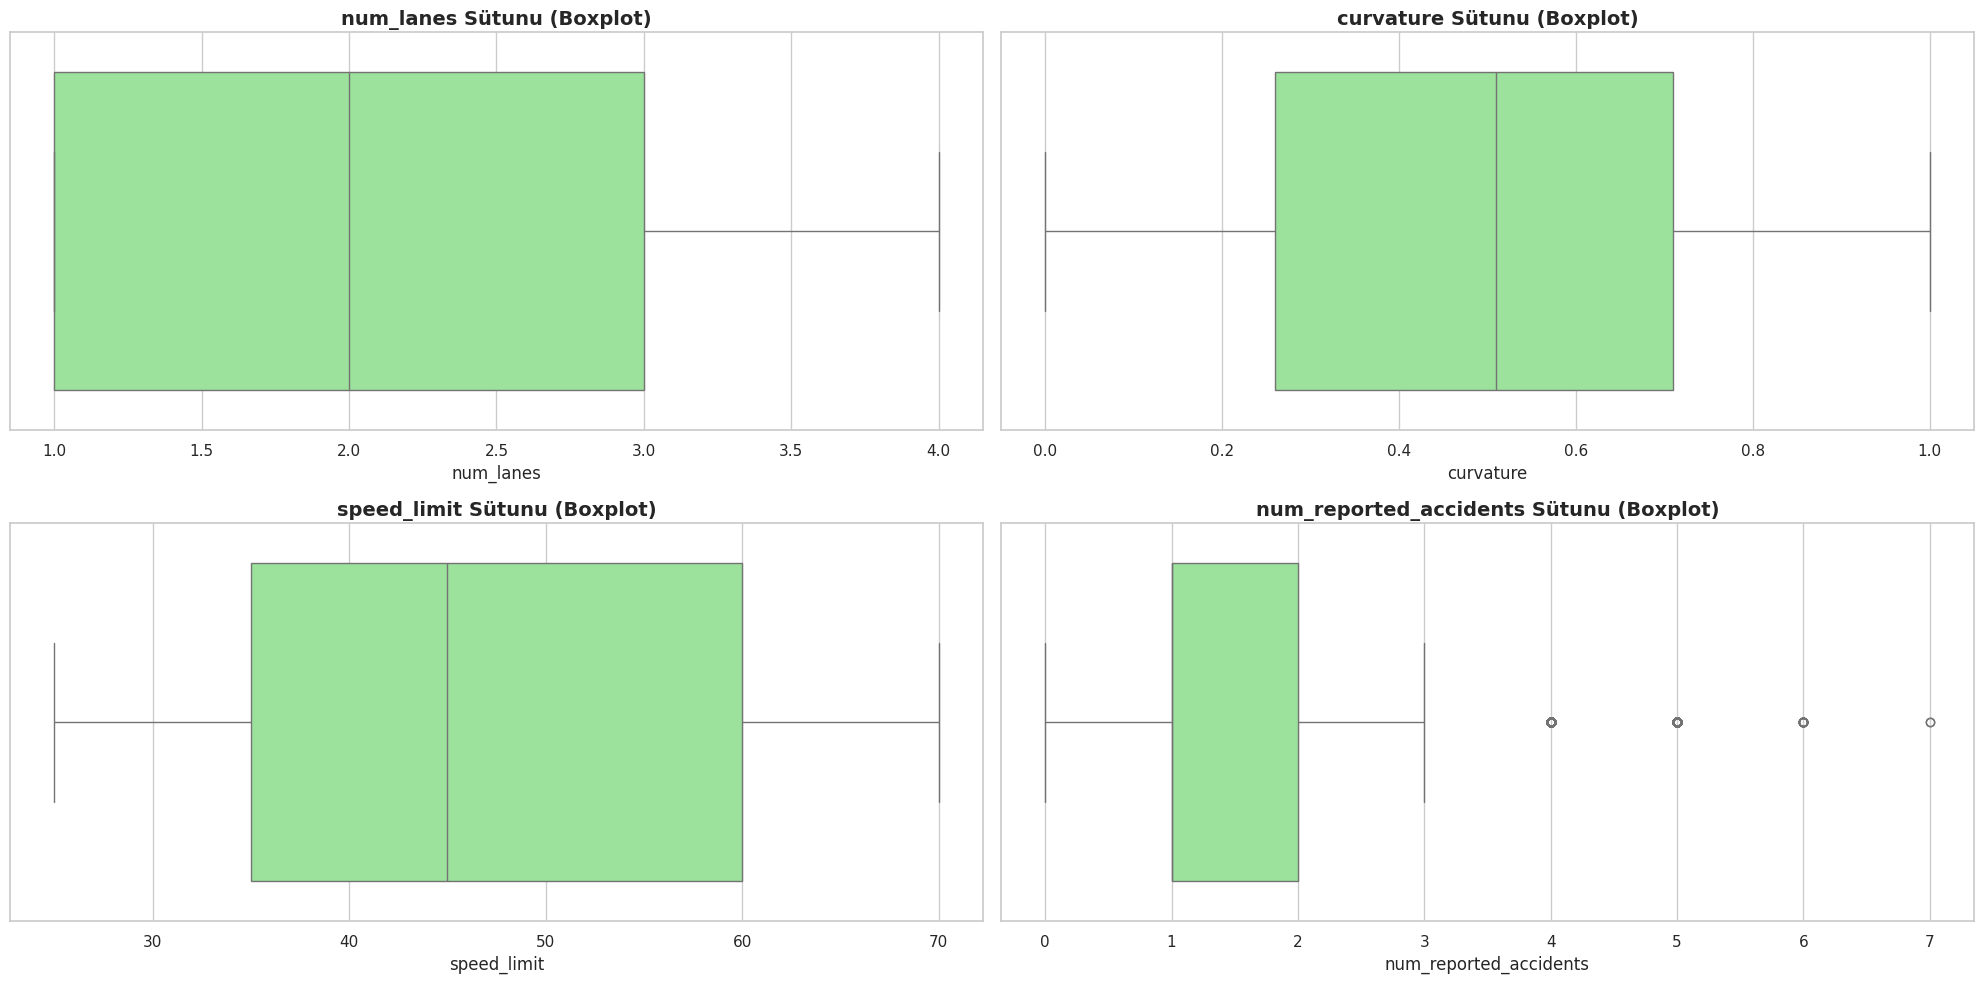

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_features):
    sns.boxplot(
        x=df[col],
        ax=axes[i],
        color='lightgreen'
    )
    axes[i].set_title(f'{col} Sütunu (Boxplot)', fontsize=14, weight='bold')
    axes[i].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()

*** Sayısal Özellikler vs. Hedef Değişken (Yoğunluk Grafikleri) ***


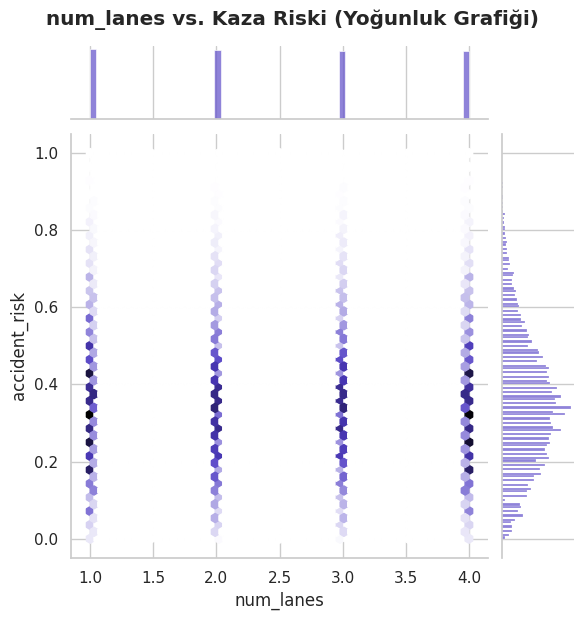

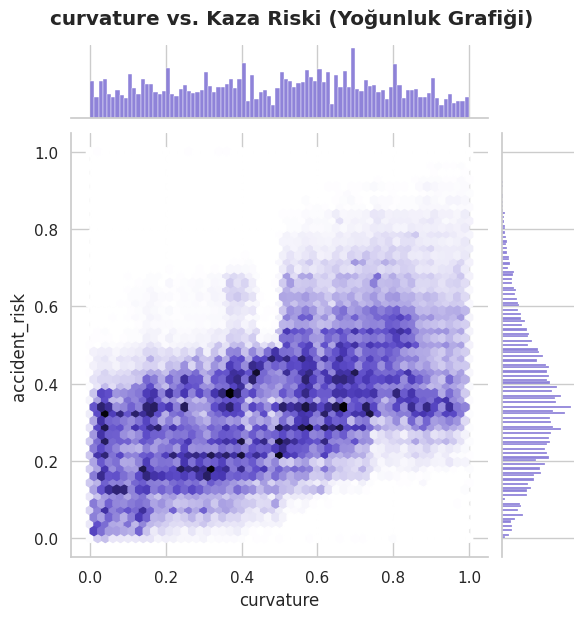

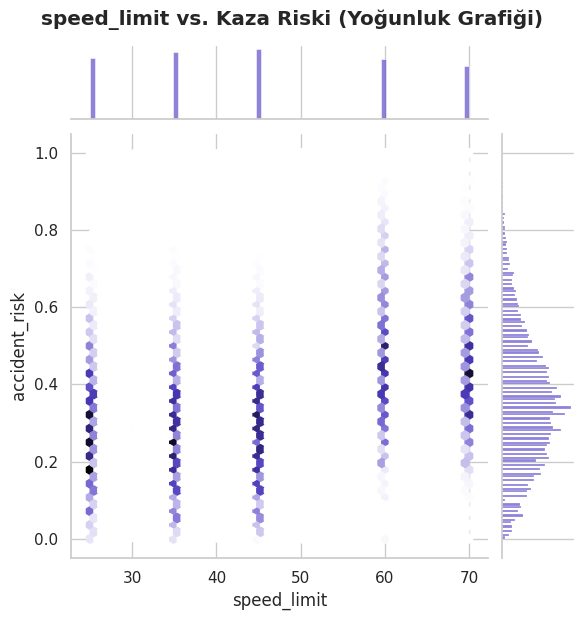

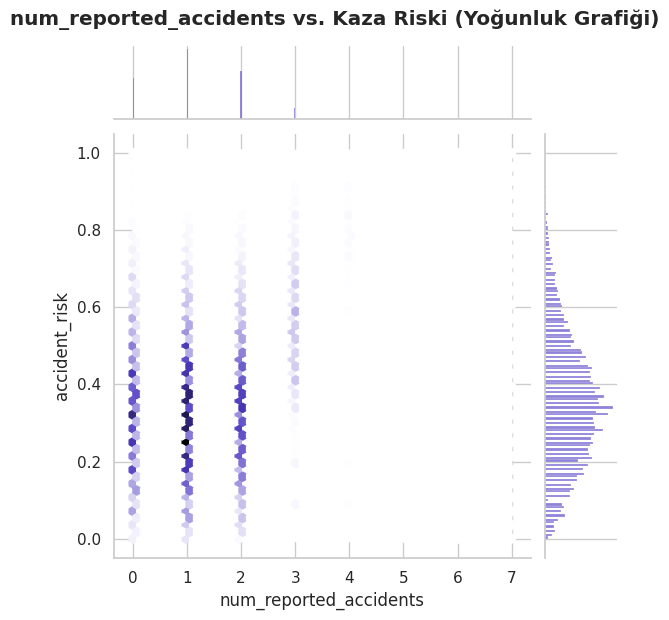

In [ ]:
print("*** Sayısal Özellikler vs. Hedef Değişken (Yoğunluk Grafikleri) ***")

# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']
for col in numerical_features:
    sns.jointplot(
        data=df,
        x=col,
        y='accident_risk',
        kind='hex',            # Grafik türü: yoğunluk
        color='slateblue'
    )

    plt.suptitle(f'{col} vs. Kaza Riski (Yoğunluk Grafiği)', y=1.03, weight='bold')
    plt.show()

In [ ]:
# categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
#                        'public_road', 'time_of_day', 'holiday', 'school_season']

for col in categorical_features:
    df[col] = df[col].astype(str)

print("Veri tipleri 'string' (object) olarak güncellendi.")
print(df[categorical_features].info())

Veri tipleri 'string' (object) olarak güncellendi.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   road_type           517754 non-null  object
 1   lighting            517754 non-null  object
 2   weather             517754 non-null  object
 3   road_signs_present  517754 non-null  object
 4   public_road         517754 non-null  object
 5   time_of_day         517754 non-null  object
 6   holiday             517754 non-null  object
 7   school_season       517754 non-null  object
dtypes: object(8)
memory usage: 31.6+ MB
None


** Kategorik Özellikler vs. Hedef Değişken **


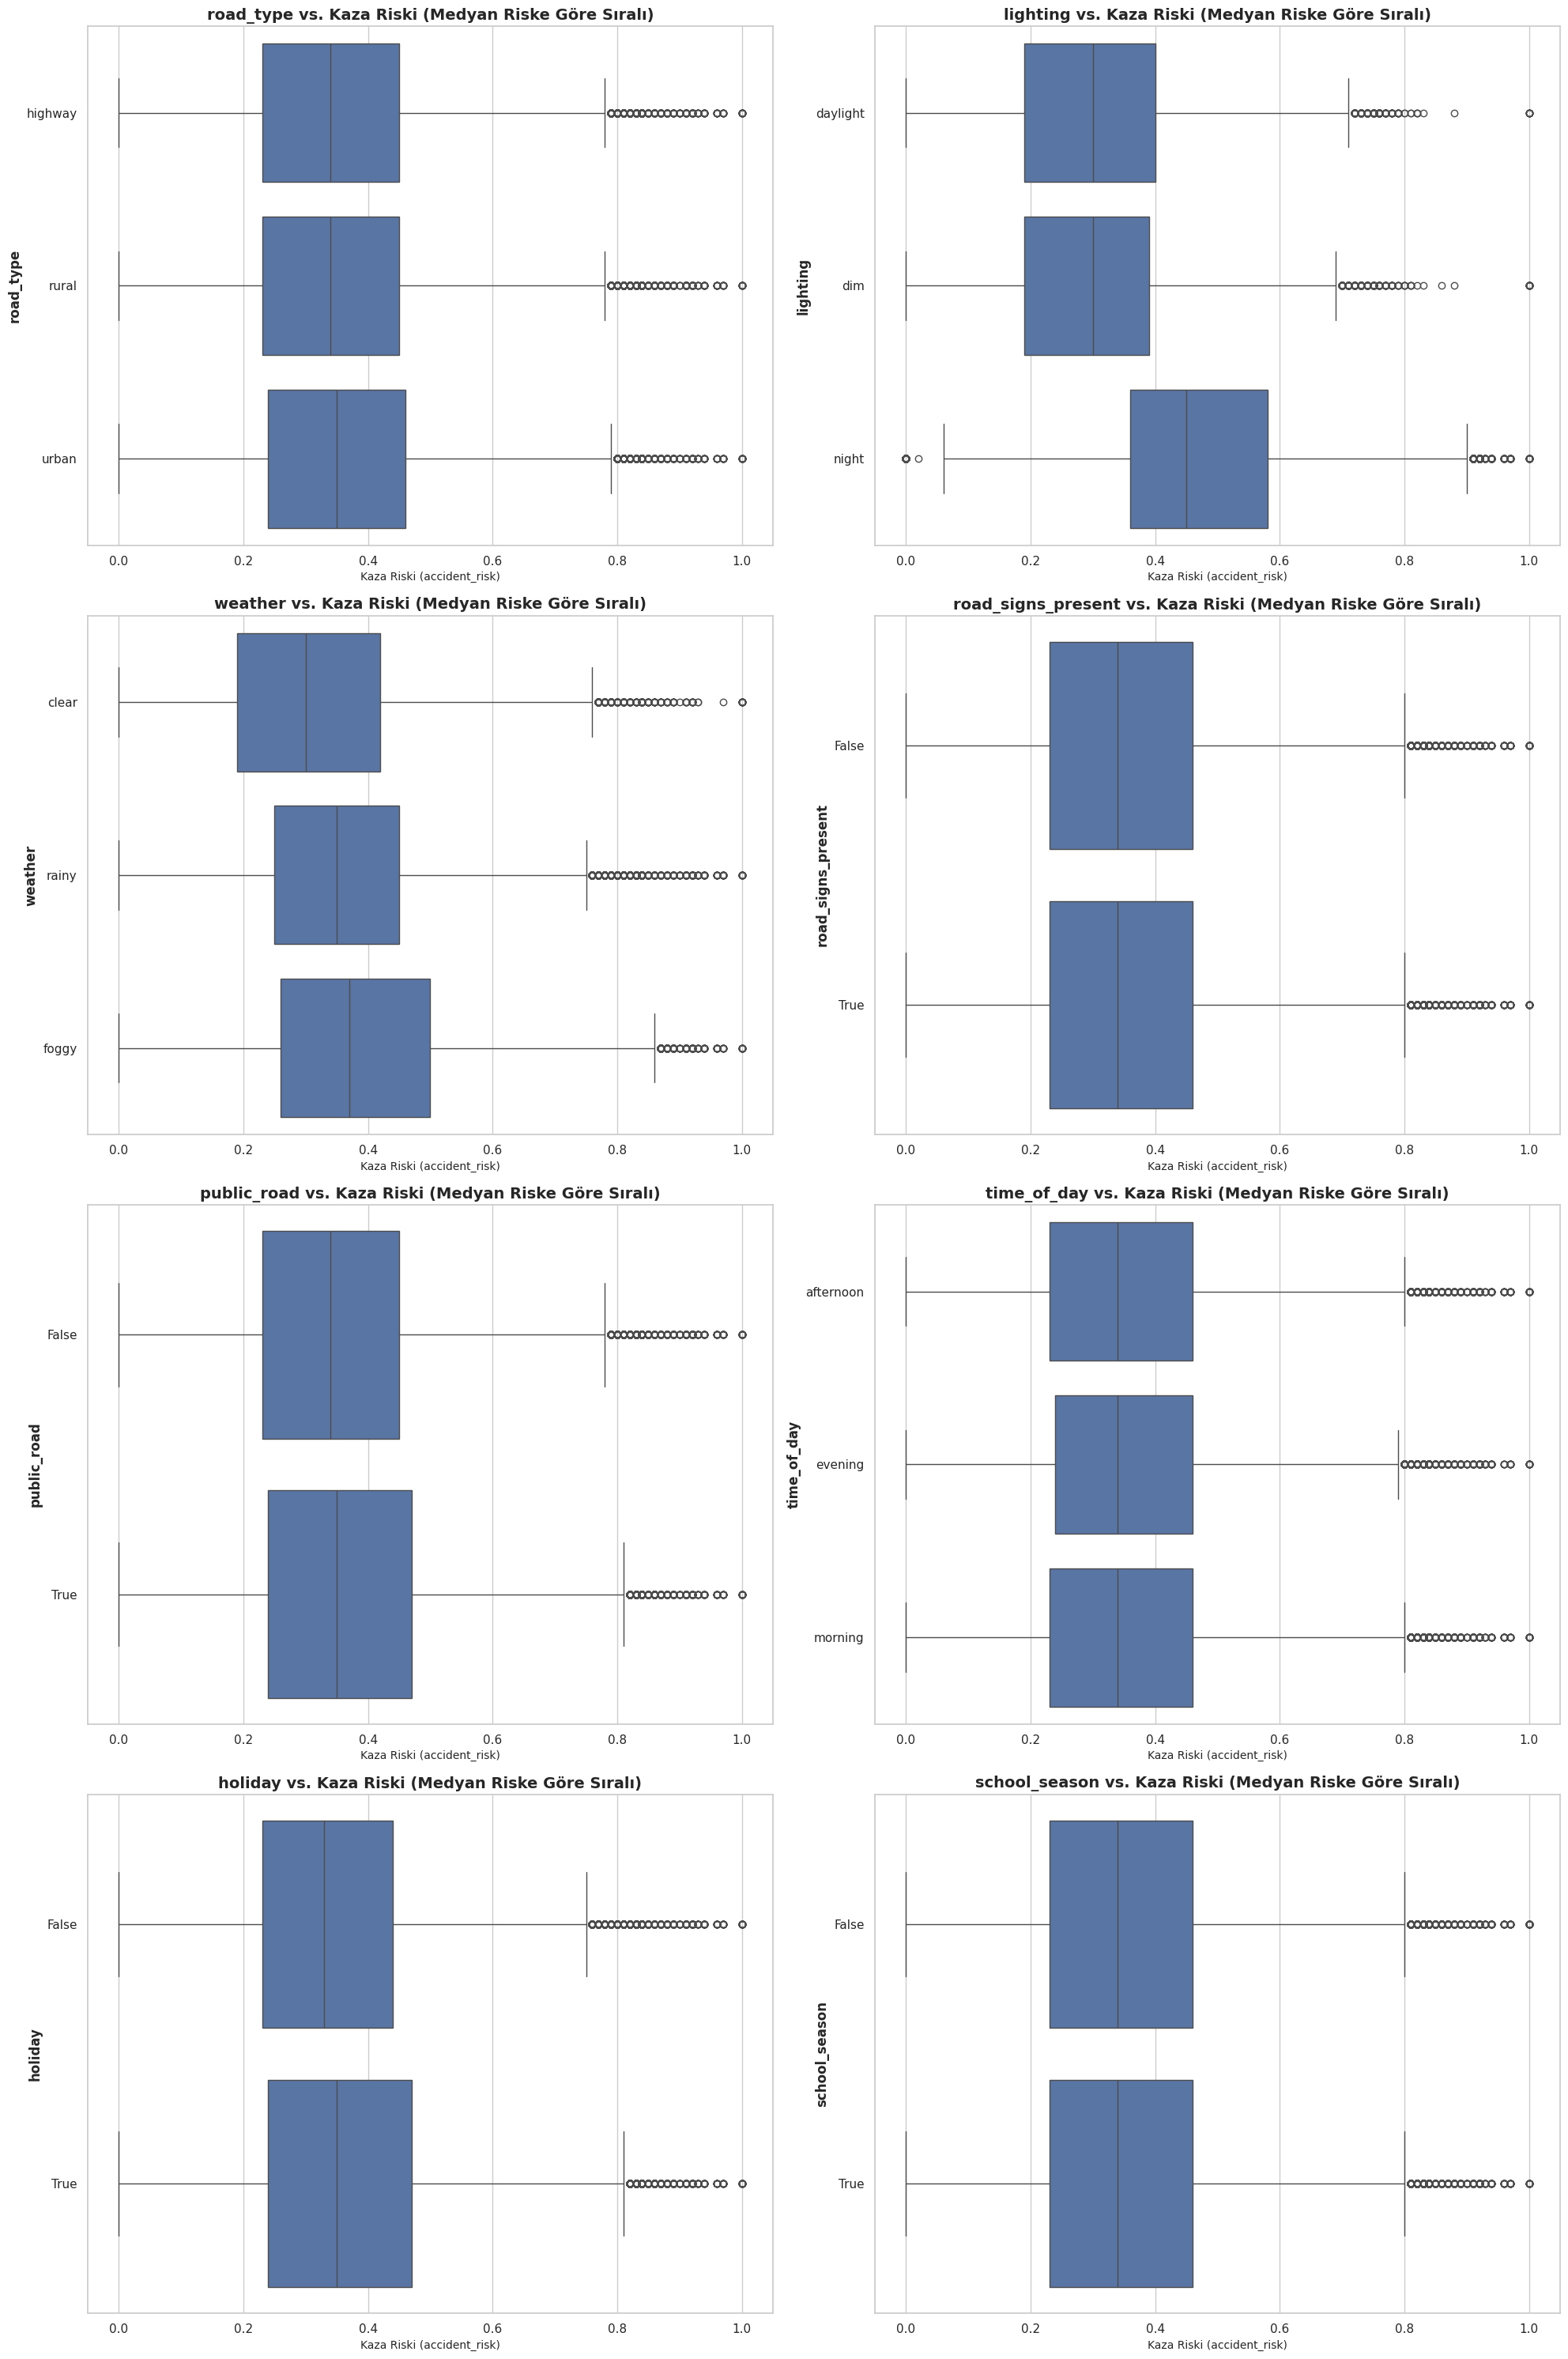

In [ ]:
print("** Kategorik Özellikler vs. Hedef Değişken **")

fig, axes = plt.subplots(4, 2, figsize=(20, 30))
axes = axes.flatten()

for i, col in enumerate(categorical_features):
    order = df.groupby(col)['accident_risk'].median().sort_values().index

    sns.boxplot(
        data=df,
        x='accident_risk',
        y=col,
        ax=axes[i],
        order=order
    )

    axes[i].set_title(f'{col} vs. Kaza Riski (Medyan Riske Göre Sıralı)', fontsize=14, weight='bold')
    axes[i].set_xlabel('Kaza Riski (accident_risk)', fontsize=10)
    axes[i].set_ylabel(col, fontsize=12, weight='bold')

plt.tight_layout()
plt.show()

** Sayısal Özellikler Arası Korelasyon Matrisi **
Korelasyon matrisi şu sütunlar için hesaplanıyor: ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents', 'accident_risk']


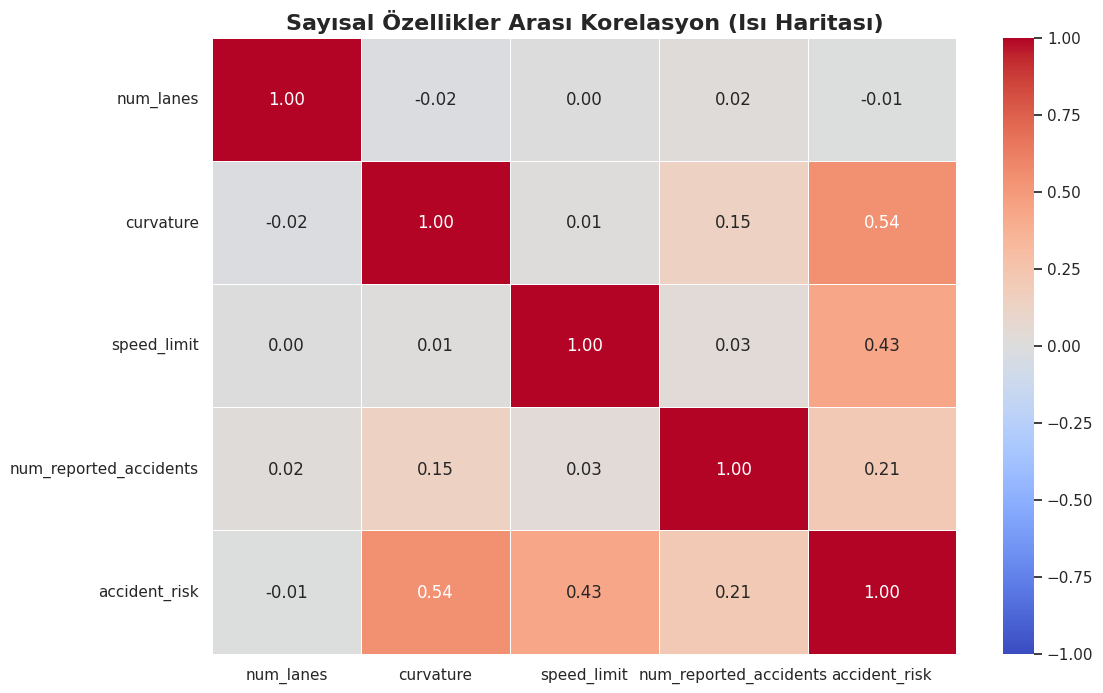

In [ ]:
print("** Sayısal Özellikler Arası Korelasyon Matrisi **")

correlation_cols = numerical_features + ['accident_risk']

print(f"Korelasyon matrisi şu sütunlar için hesaplanıyor: {correlation_cols}")
correlation_matrix = df[correlation_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title('Sayısal Özellikler Arası Korelasyon (Isı Haritası)', fontsize=16, weight='bold')
plt.show()

** Etkileşim Analizi (lighting x road_type) **


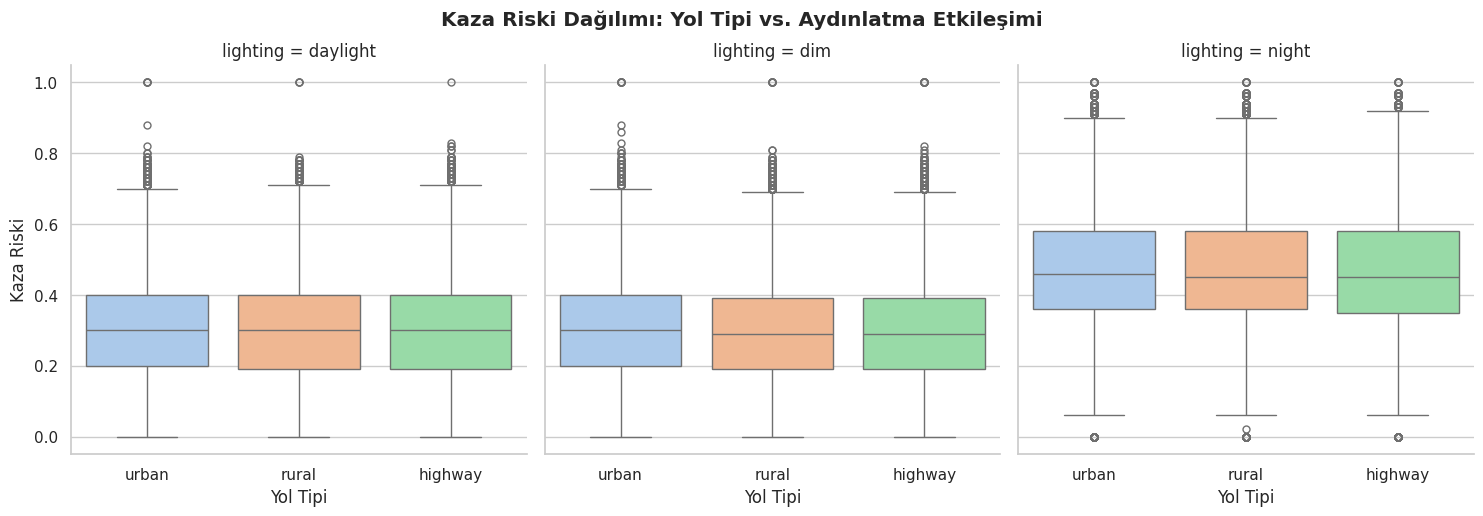

In [ ]:
print("** Etkileşim Analizi (lighting x road_type) **")

g = sns.catplot(
    data=df,
    x='road_type',
    y='accident_risk',
    col='lighting',
    kind='box',
    palette='pastel',


    hue='road_type',
    legend=False

)

g.fig.suptitle('Kaza Riski Dağılımı: Yol Tipi vs. Aydınlatma Etkileşimi', y=1.03, weight='bold')
g.set_axis_labels("Yol Tipi", "Kaza Riski")
plt.show()

** Sayısal-Kategorik Etkileşim Analizi **


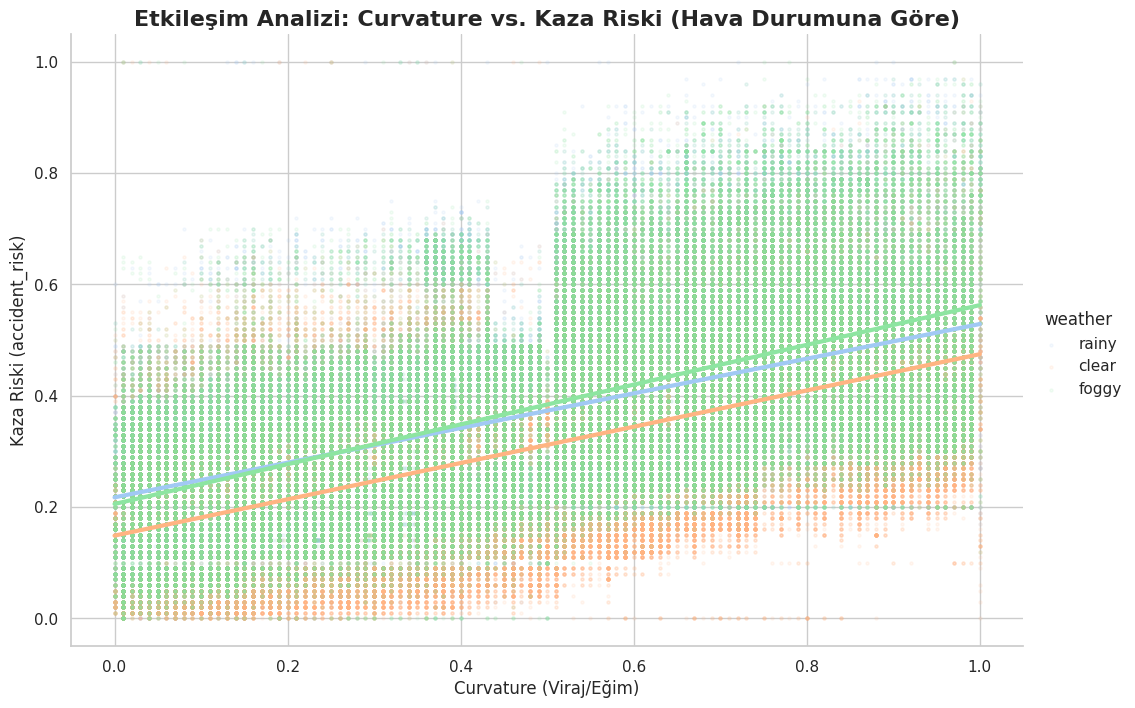

In [ ]:
print("** Sayısal-Kategorik Etkileşim Analizi **")

# 'curvature' (güçlü sayısal) ile 'weather' (güçlü kategorik) arasındaki etkileş
sns.lmplot(
    data=df,
    x='curvature',
    y='accident_risk',
    hue='weather',
    palette='pastel',
    height=7,
    aspect=1.5,
    scatter_kws={'s': 5, 'alpha': 0.1},
    line_kws={'lw': 3}
)

plt.title('Etkileşim Analizi: Curvature vs. Kaza Riski (Hava Durumuna Göre)', fontsize=16, weight='bold')
plt.xlabel('Curvature (Viraj/Eğim)', fontsize=12)
plt.ylabel('Kaza Riski (accident_risk)', fontsize=12)
plt.show()

In [ ]:
print("** Hızlı çizim için örneklem alacağız **")

# Veri setinden rastgele 50.000 satır seç
df_sample = df.sample(n=50000, random_state=42)

print(f"Yeni boyut: {df_sample.shape}")

** Hızlı çizim için örneklem alacağız **
Yeni boyut: (50000, 14)


** PairGrid çiziliyor **


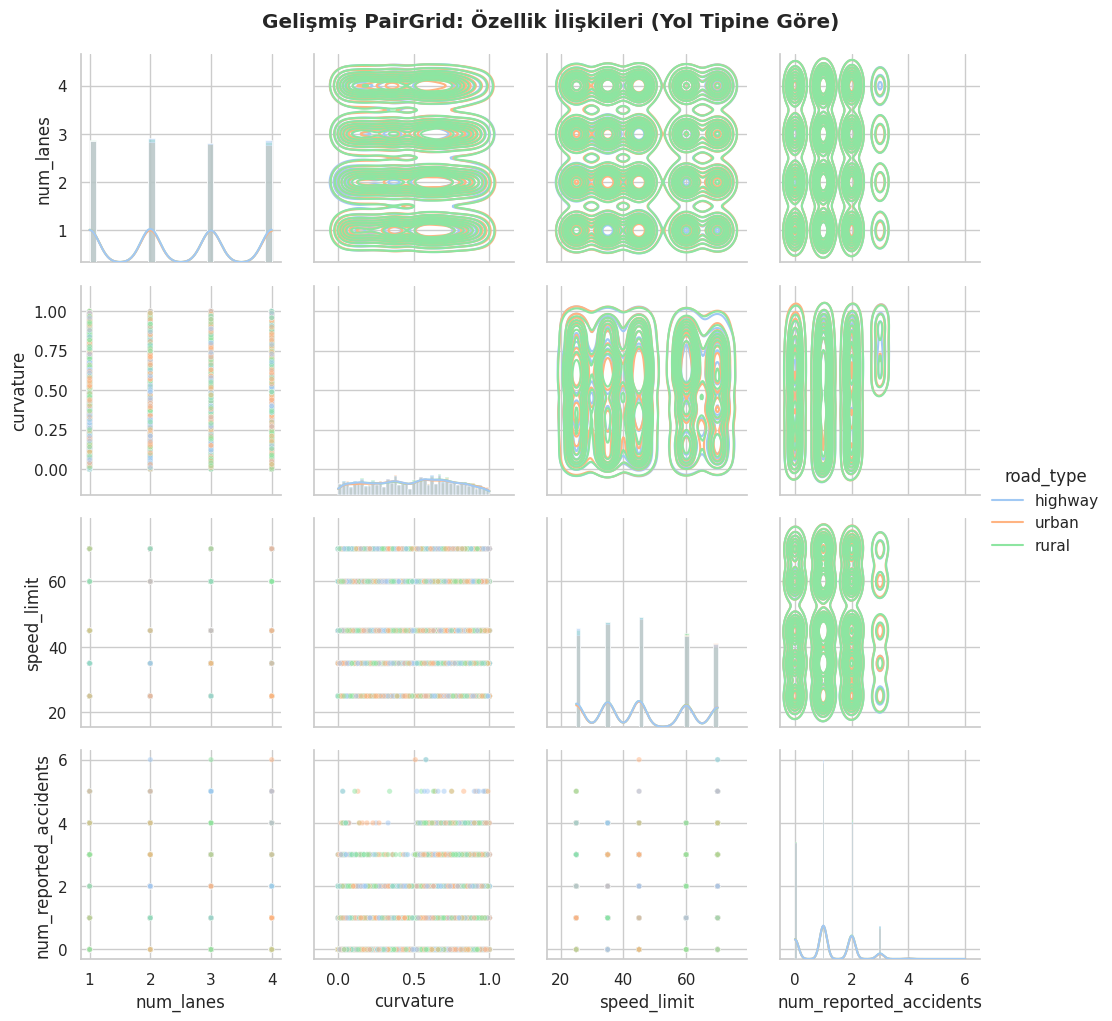

In [ ]:
print("** PairGrid çiziliyor **")
# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

# PairGrid ızgarasını oluşturalım.
# hue='road_type' ile 'highway', 'urban', 'rural' için renkleri ayır.
g = sns.PairGrid(
    df_sample,
    vars=numerical_features,
    hue='road_type',
    palette='pastel'
)
g.map_lower(sns.scatterplot, s=15, alpha=0.5)
g.map_diag(sns.histplot, kde=True)
g.map_upper(sns.kdeplot)
g.add_legend()

plt.suptitle('Gelişmiş PairGrid: Özellik İlişkileri (Yol Tipine Göre)', y=1.02, weight='bold')
plt.show()

In [ ]:
import scipy.stats as ss
import numpy as np

# Cramér's V hesapları iki kategorik değerler için
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)


    if min((kcorr-1), (rcorr-1)) == 0:
        return np.nan
    else:
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

print("Cramér's V hesaplama fonksiyonu 'cramers_v(x, y)' tanımlandı.")

Cramér's V hesaplama fonksiyonu 'cramers_v(x, y)' tanımlandı.


In [ ]:
print("Kategorik özellikler listesi...")
# categorical_features = ['road_type', 'lighting', 'weather', 'road_signs_present',
#                        'public_road', 'time_of_day', 'holiday', 'school_season']

cramers_matrix = pd.DataFrame(np.zeros((len(categorical_features), len(categorical_features))),
                                index=categorical_features,
                                columns=categorical_features)

for col1 in categorical_features:
    for col2 in categorical_features:
        if col1 == col2:
            cramers_matrix.loc[col1, col2] = 1.0
        else:
            cramers_matrix.loc[col1, col2] = cramers_v(df[col1], df[col2])

print("Kategorik korelasyon matrisi hesaplandı.")
print(cramers_matrix.round(2))

Kategorik özellikler listesi...
Kategorik korelasyon matrisi hesaplandı.
                    road_type  lighting  weather  road_signs_present  \
road_type                1.00      0.01     0.01                0.00   
lighting                 0.01      1.00     0.05                0.01   
weather                  0.01      0.05     1.00                0.01   
road_signs_present       0.00      0.01     0.01                1.00   
public_road              0.00      0.00     0.01                0.00   
time_of_day              0.00      0.01     0.02                0.01   
holiday                  0.00      0.02     0.02                0.00   
school_season            0.00      0.00     0.00                0.00   

                    public_road  time_of_day  holiday  school_season  
road_type                  0.00         0.00     0.00           0.00  
lighting                   0.00         0.01     0.02           0.00  
weather                    0.01         0.02     0.02           0

** Kategorik Özellikler Arası Korelasyon (Cramér's V Isı Haritası) **


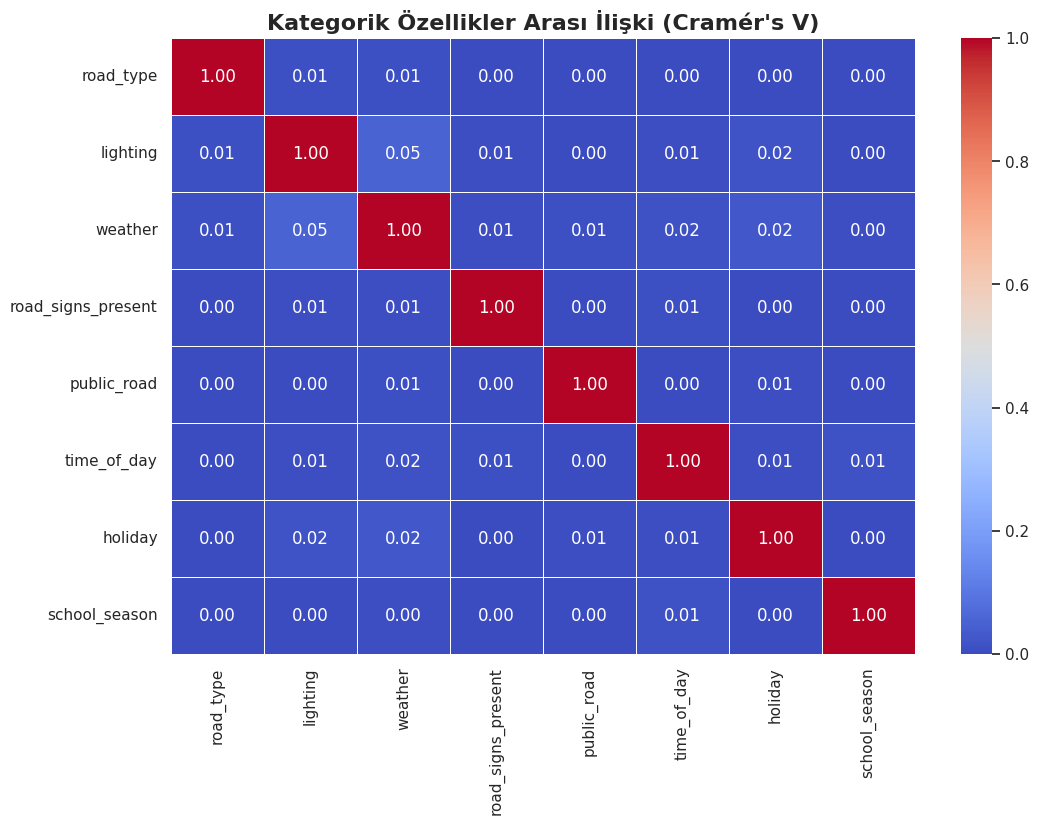

In [ ]:
print("** Kategorik Özellikler Arası Korelasyon (Cramér's V Isı Haritası) **")

plt.figure(figsize=(12, 8))
sns.heatmap(
    cramers_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=0.5,
    vmin=0, vmax=1
)
plt.title('Kategorik Özellikler Arası İlişki (Cramér\'s V)', fontsize=16, weight='bold')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

print("** Hızlı Modelleme İçin Veri Hazırlığı **")
# categorical_features = ['road_type', 'lighting', 'weather', ...]
# numerical_features = ['num_lanes', 'curvature', 'speed_limit', 'num_reported_accidents']

X = df_sample[categorical_features + numerical_features]
y = df_sample['accident_risk']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

X_processed = preprocessor.fit_transform(X)

print(f"Veri işlendi. Yeni özellik matrisi boyutu: {X_processed.shape}")

** Hızlı Modelleme İçin Veri Hazırlığı **
Veri işlendi. Yeni özellik matrisi boyutu: (50000, 24)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

print("** Random Forest Modeli Eğitiliyor **")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_samples=0.5)
rf_model.fit(X_processed, y)

print("Model eğitildi!")

** Random Forest Modeli Eğitiliyor **
Model eğitildi!


** Kısmi Bağımlılık Grafiği Çiziliyor **


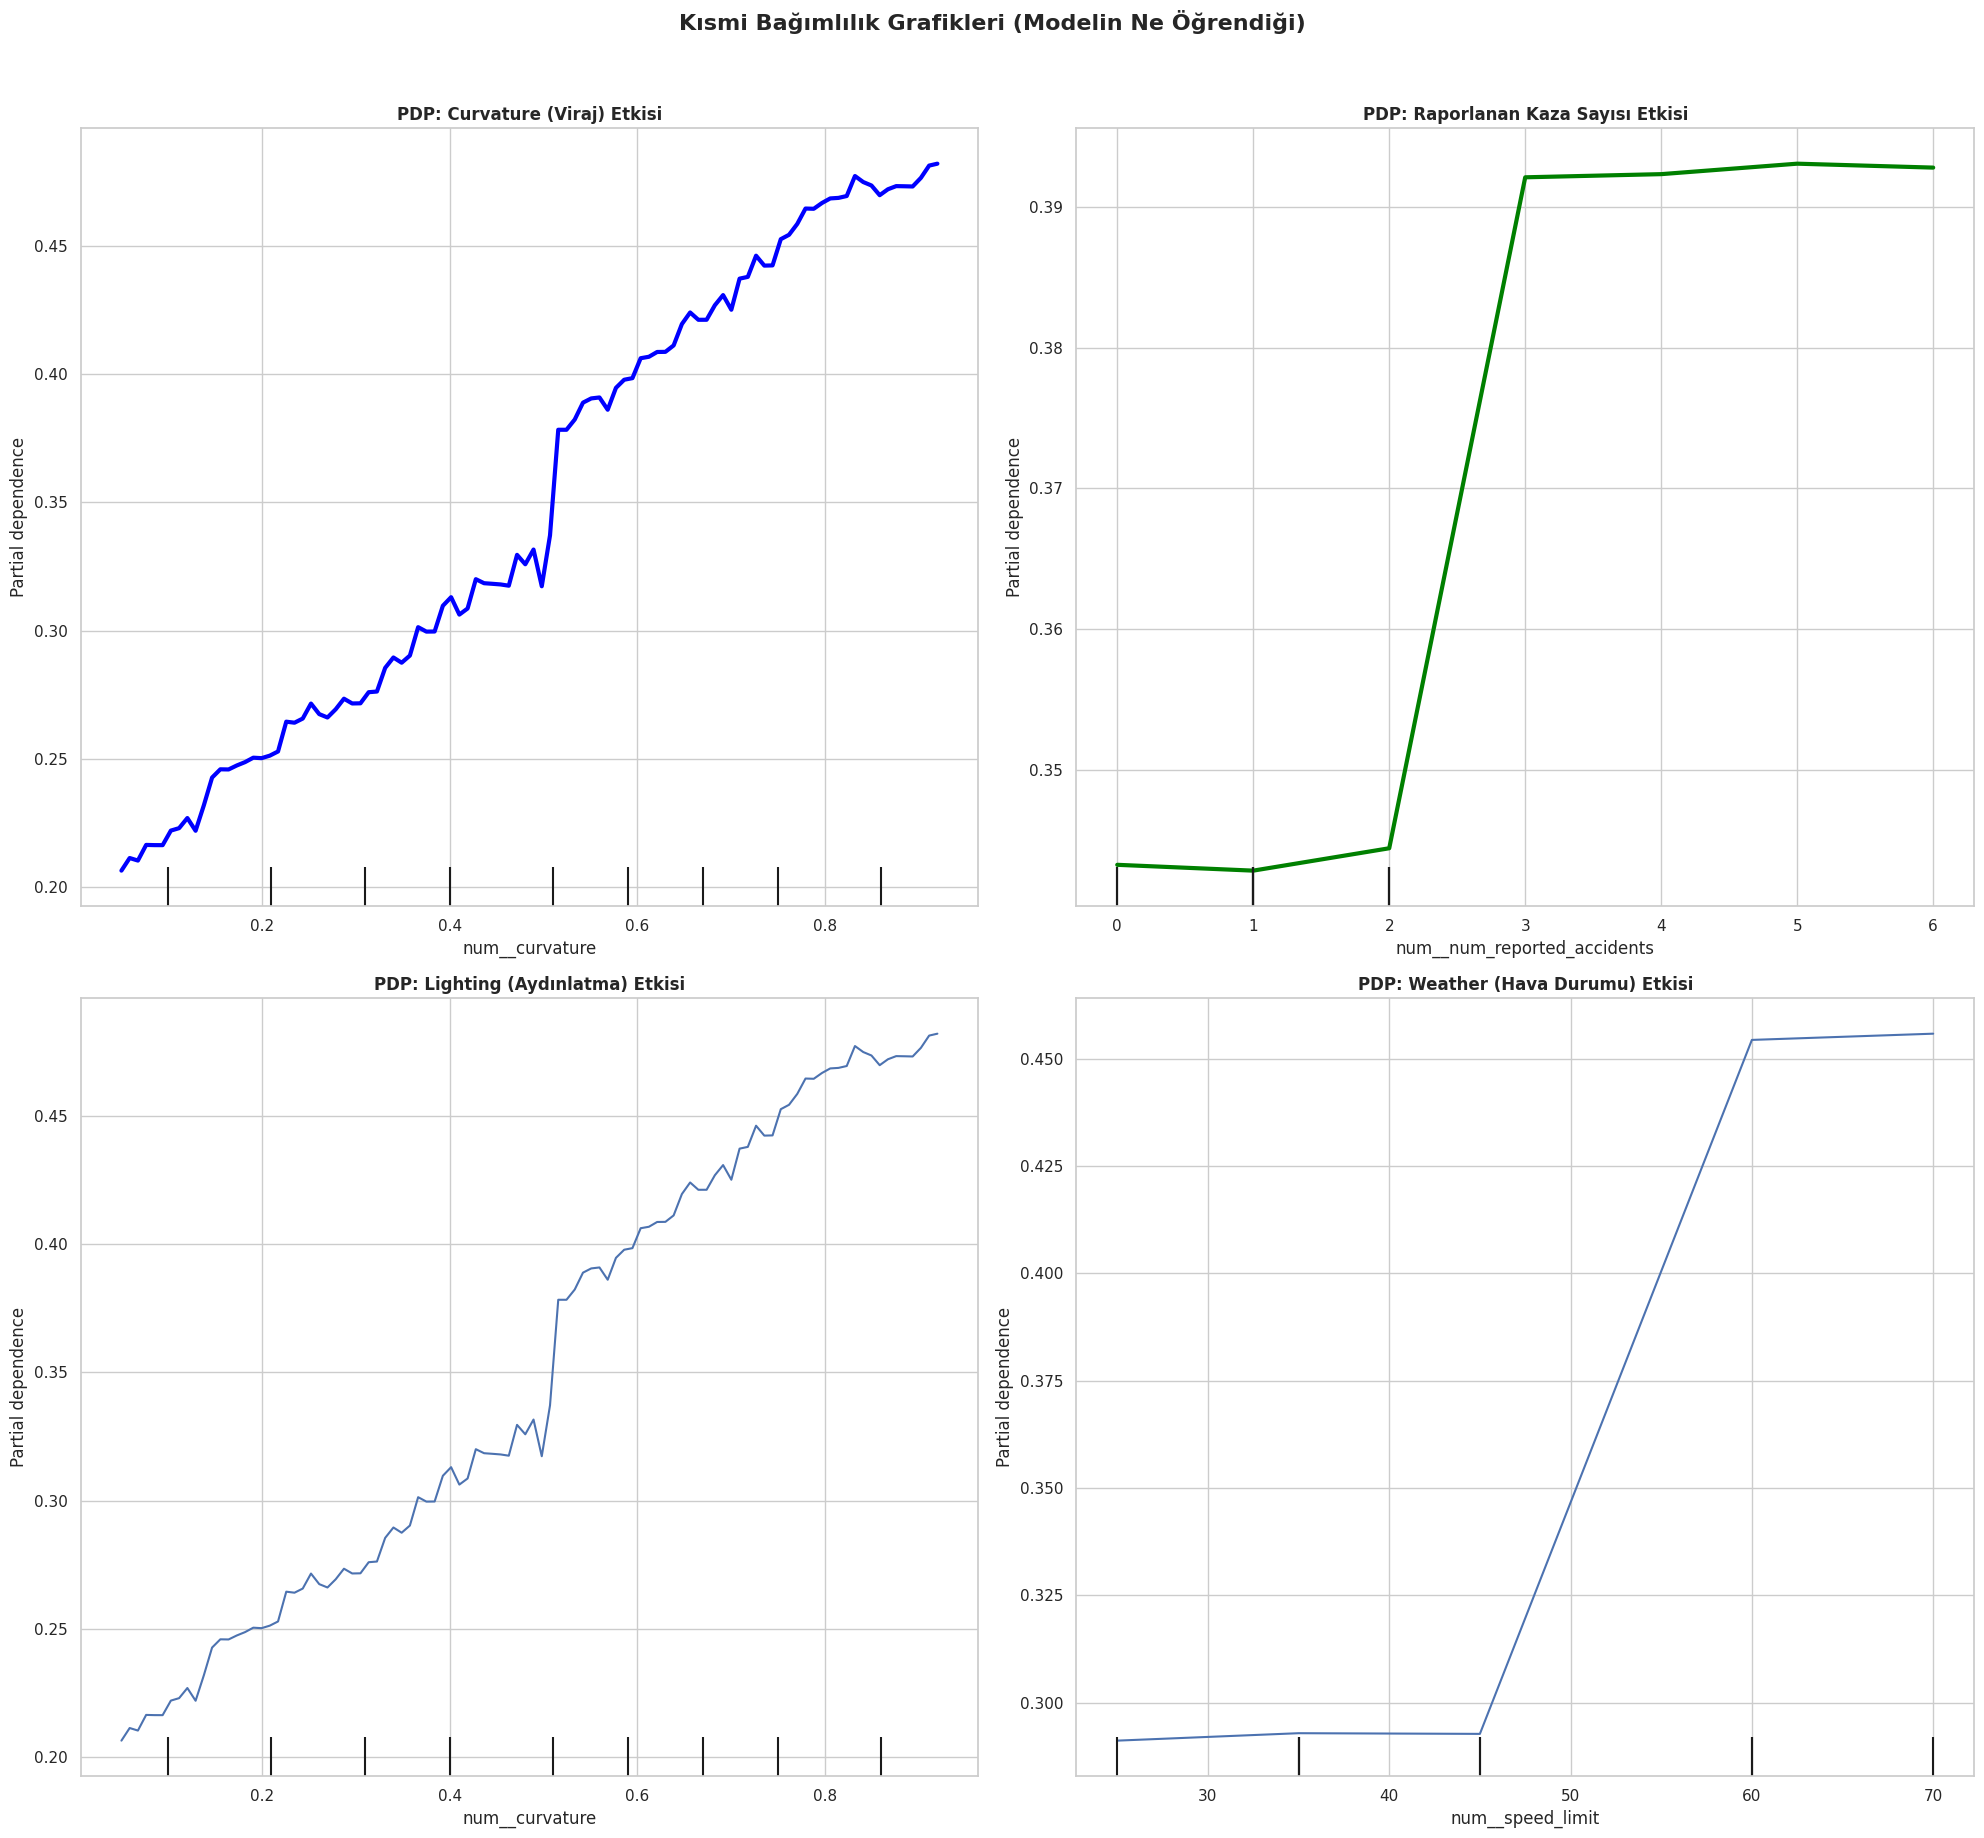

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

print("** Kısmi Bağımlılık Grafiği Çiziliyor **")

# En güçlü 2 sayısal (curvature, num_reported_accidents)
# En güçlü 2 kategorik (lighting, weather)
pdp_features_to_plot = ['curvature', 'num_reported_accidents', 'lighting', 'weather']
feature_names = preprocessor.get_feature_names_out()

fig, axes = plt.subplots(2, 2, figsize=(20, 18))

# 'curvature'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[numerical_features.index('curvature')],
    feature_names=feature_names,
    ax=axes[0, 0],
    line_kw={'color': 'blue', 'lw': 3}
)
axes[0, 0].set_title('PDP: Curvature (Viraj) Etkisi', weight='bold')

# 'num_reported_accidents'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[numerical_features.index('num_reported_accidents')],
    feature_names=feature_names,
    ax=axes[0, 1],
    line_kw={'color': 'green', 'lw': 3}
)
axes[0, 1].set_title('PDP: Raporlanan Kaza Sayısı Etkisi', weight='bold')



# 'lighting'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[categorical_features.index('lighting')],
    feature_names=feature_names,
    ax=axes[1, 0]
)
axes[1, 0].set_title('PDP: Lighting (Aydınlatma) Etkisi', weight='bold')

# 'weather'
PartialDependenceDisplay.from_estimator(
    rf_model,
    X_processed,
    features=[categorical_features.index('weather')],
    feature_names=feature_names,
    ax=axes[1, 1]
)
axes[1, 1].set_title('PDP: Weather (Hava Durumu) Etkisi', weight='bold')


plt.suptitle("Kısmi Bağımlılık Grafikleri (Modelin Ne Öğrendiği)", y=1.02, fontsize=16, weight='bold')
plt.tight_layout()
plt.show()